In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
file_path = 'Bird Strikes data.xlsx - Bird Strikes.csv'
df = pd.read_csv(file_path)
df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [2]:
# Checking for missing values in the dataset
missing_values = df.isnull().sum()
missing_values

Record ID                                     0
Aircraft: Type                              129
Airport: Name                               129
Altitude bin                                129
Aircraft: Make/Model                          0
Wildlife: Number struck                     129
Wildlife: Number Struck Actual                0
Effect: Impact to flight                    129
FlightDate                                  129
Effect: Indicated Damage                      0
Aircraft: Number of engines?                267
Aircraft: Airline/Operator                  129
Origin State                                449
When: Phase of flight                       129
Conditions: Precipitation                     0
Remains of wildlife collected?                0
Remains of wildlife sent to Smithsonian       0
Remarks                                    4771
Wildlife: Size                              129
Conditions: Sky                               0
Wildlife: Species                       

In [3]:
# Dropping columns with a large number of missing values
columns_to_drop = [
    'Remarks', 'Origin State'
]
df = df.drop(columns=columns_to_drop)

# Remove commas from the "Feet above ground" column
df['Feet above ground'] = df['Feet above ground'].str.replace(',', '')

# Convert the column to numeric type
df['Feet above ground'] = pd.to_numeric(df['Feet above ground'], errors='coerce')

# Filling missing values with appropriate strategies
df['Aircraft: Type'].fillna('Unknown', inplace=True)
df['Airport: Name'].fillna('Unknown', inplace=True)
df['Altitude bin'].fillna('Unknown', inplace=True)
df['Wildlife: Number struck'].fillna('Unknown', inplace=True)
df['Effect: Impact to flight'].fillna('Unknown', inplace=True)
df['FlightDate'].fillna('Unknown', inplace=True)
df['Aircraft: Number of engines?'].fillna(df['Aircraft: Number of engines?'].mode()[0], inplace=True)
df['Aircraft: Airline/Operator'].fillna('Unknown', inplace=True)
df['When: Phase of flight'].fillna('Unknown', inplace=True)
df['Wildlife: Size'].fillna('Unknown', inplace=True)
df['Pilot warned of birds or wildlife?'].fillna('Unknown', inplace=True)
df['Feet above ground'].fillna(df['Feet above ground'].median(), inplace=True)
df['Is Aircraft Large?'].fillna('Unknown', inplace=True)

# Converting 'FlightDate' to datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], errors='coerce')

df.head()

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,2000-11-23,Caused damage,...,False,False,Medium,No Cloud,Unknown bird - medium,N,"30,736",1500.0,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,None,2001-07-25,Caused damage,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0.0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,None,2001-09-14,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,2002-09-05,No damage,...,True,False,Small,Some Cloud,European starling,Y,0,50.0,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,None,2003-06-23,No damage,...,False,False,Small,No Cloud,European starling,N,0,50.0,0,No


In [4]:
# Convert 'FlightDate' to datetime format, specifying the format
df['FlightDate'] = pd.to_datetime(df['FlightDate'], format='%m/%d/%y %H:%M', errors='coerce')

# Extracting the year from the FlightDate column
df['Year'] = df['FlightDate'].dt.year

# Aggregating the data to get the number of bird strikes per year
yearly_data = df['Year'].value_counts().sort_index()

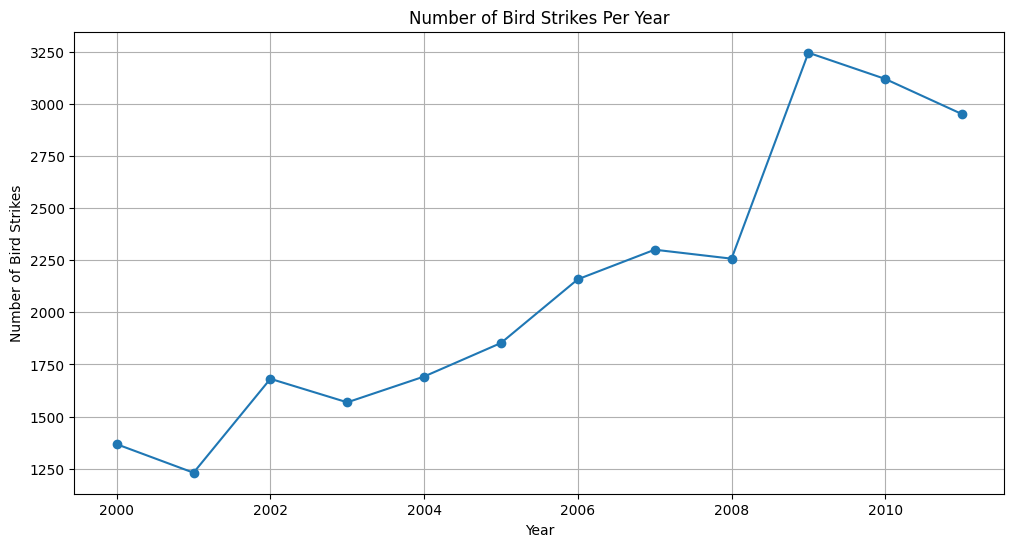

2000.0    1367
2001.0    1230
2002.0    1681
2003.0    1568
2004.0    1692
2005.0    1853
2006.0    2159
2007.0    2301
2008.0    2258
2009.0    3247
2010.0    3121
2011.0    2952
Name: Year, dtype: int64

In [5]:
import matplotlib.pyplot as plt
# Plotting the number of bird strikes per year
plt.figure(figsize=(12, 6))
plt.plot(yearly_data.index, yearly_data.values, marker='o', linestyle='-')
plt.title('Number of Bird Strikes Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Bird Strikes')
plt.grid(True)
plt.show()

yearly_data

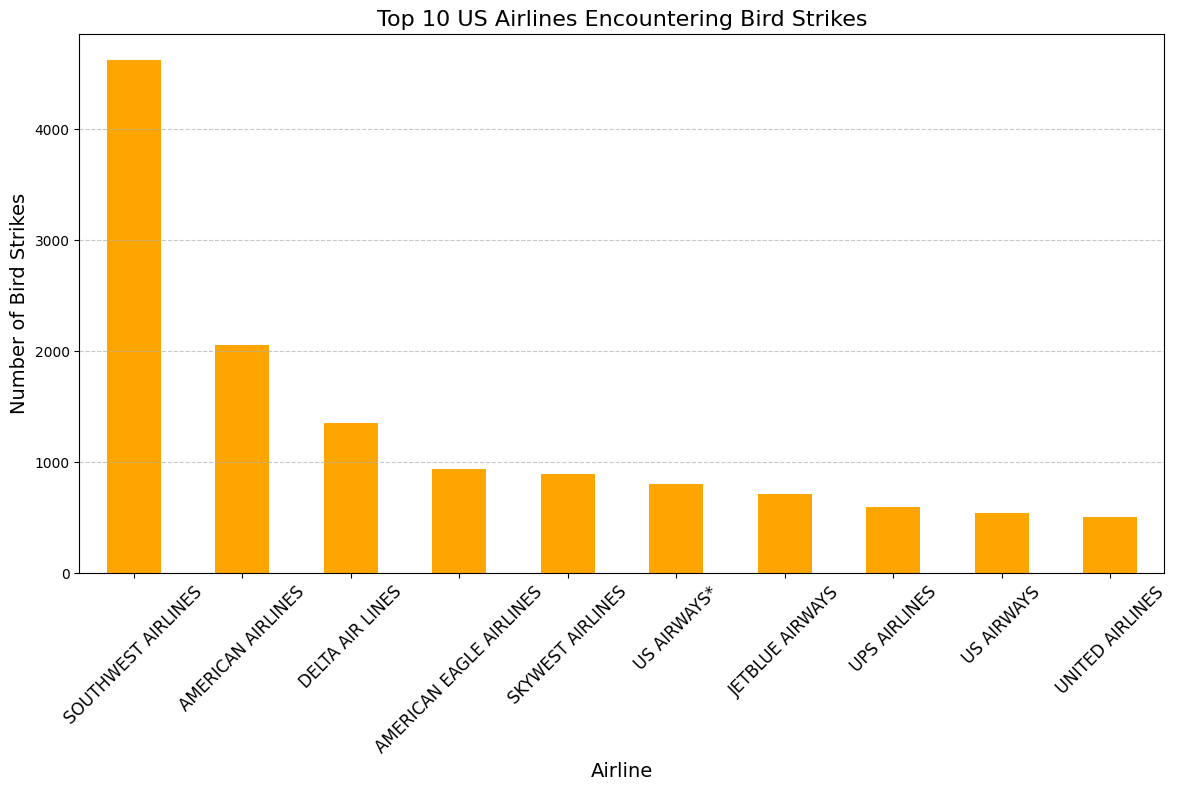

SOUTHWEST AIRLINES         4628
AMERICAN AIRLINES          2058
DELTA AIR LINES            1349
AMERICAN EAGLE AIRLINES     932
SKYWEST AIRLINES            891
US AIRWAYS*                 797
JETBLUE AIRWAYS             708
UPS AIRLINES                590
US AIRWAYS                  540
UNITED AIRLINES             506
Name: Aircraft: Airline/Operator, dtype: int64

In [6]:
# Counting the occurrences of each airline
airline_counts = df['Aircraft: Airline/Operator'].value_counts()

# Identifying the top 10 airlines with the most bird strikes
top_10_airlines = airline_counts.head(10)

# Exclude 'Business' and get the top 10 actual airlines
top_10_airlines = airline_counts[airline_counts.index != 'BUSINESS'].head(10)

# Plotting the top 10 airlines with the most bird strikes
plt.figure(figsize=(14, 7))
top_10_airlines.plot(kind='bar', color='orange')
plt.title('Top 10 US Airlines Encountering Bird Strikes', fontsize=16)
plt.xlabel('Airline', fontsize=14)
plt.ylabel('Number of Bird Strikes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


top_10_airlines

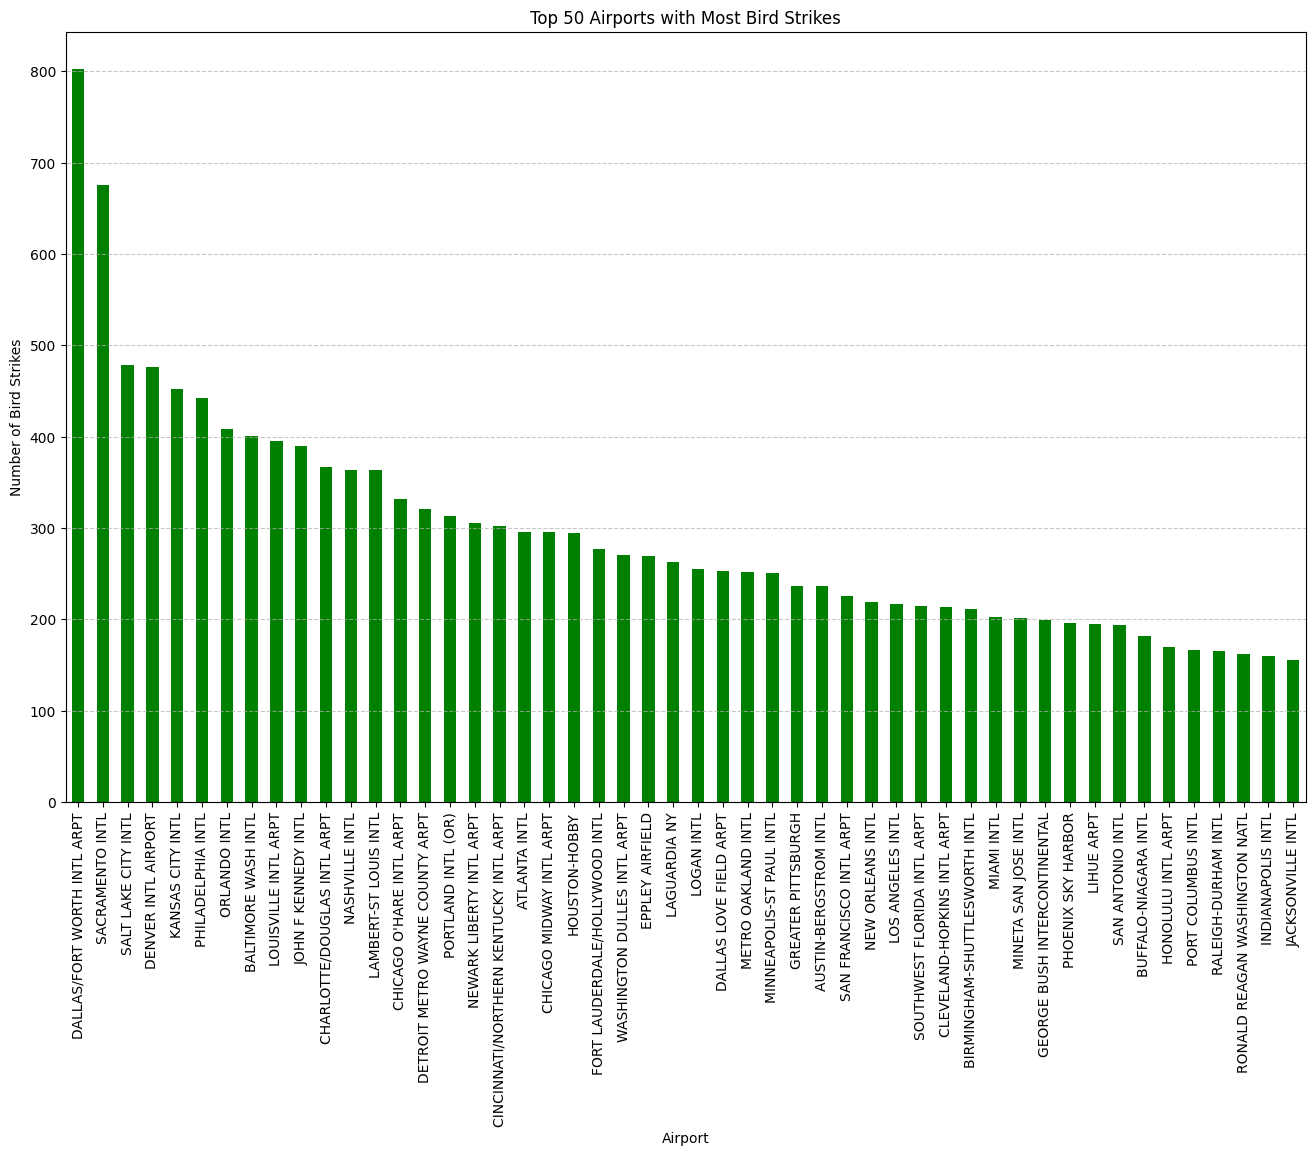

DALLAS/FORT WORTH INTL ARPT               803
SACRAMENTO INTL                           676
SALT LAKE CITY INTL                       479
DENVER INTL AIRPORT                       476
KANSAS CITY INTL                          452
PHILADELPHIA INTL                         442
ORLANDO INTL                              408
BALTIMORE WASH INTL                       401
LOUISVILLE INTL ARPT                      395
JOHN F KENNEDY INTL                       390
CHARLOTTE/DOUGLAS INTL ARPT               367
NASHVILLE INTL                            364
LAMBERT-ST LOUIS INTL                     363
CHICAGO O'HARE INTL ARPT                  332
DETROIT METRO WAYNE COUNTY ARPT           321
PORTLAND INTL (OR)                        313
NEWARK LIBERTY INTL ARPT                  305
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    302
ATLANTA INTL                              296
CHICAGO MIDWAY INTL ARPT                  296
HOUSTON-HOBBY                             294
FORT LAUDERDALE/HOLLYWOOD INTL    

In [7]:
# Counting the occurrences of each airport
airport_counts = df['Airport: Name'].value_counts()

# Identifying the top 50 airports with the most bird strikes
top_50_airports = airport_counts.head(50)

# Plotting the top 50 airports with the most bird strikes
plt.figure(figsize=(16, 10))
top_50_airports.plot(kind='bar', color='green')
plt.title('Top 50 Airports with Most Bird Strikes')
plt.xlabel('Airport')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

top_50_airports

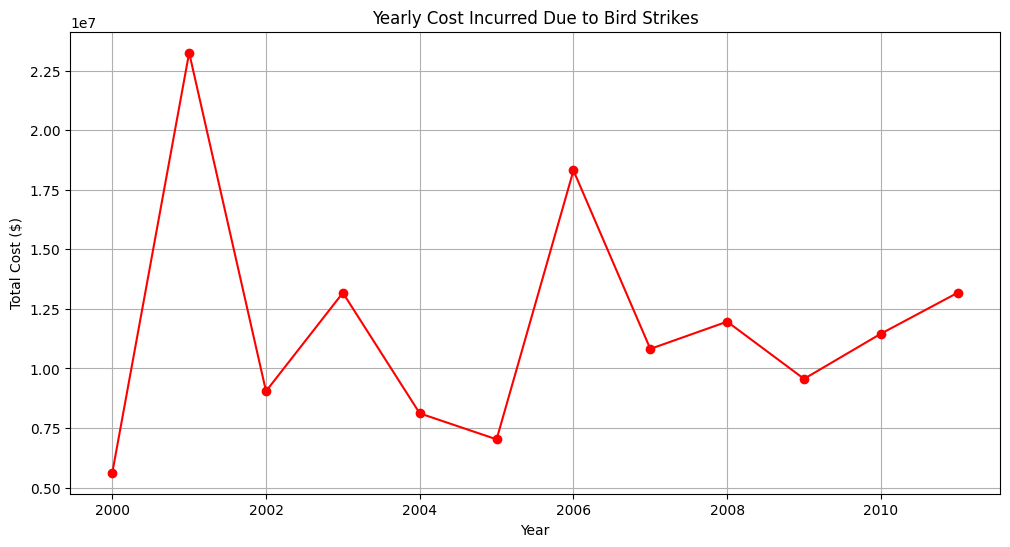

Year
2000.0     5625496.0
2001.0    23252168.0
2002.0     9046405.0
2003.0    13176787.0
2004.0     8116866.0
2005.0     7026670.0
2006.0    18309903.0
2007.0    10822426.0
2008.0    11966121.0
2009.0     9564327.0
2010.0    11459879.0
2011.0    13180130.0
Name: Cost: Total $, dtype: float64

In [8]:
# Converting 'Cost: Total $' to numeric and handling non-numeric characters
df['Cost: Total $'] = df['Cost: Total $'].replace('[\$,]', '', regex=True).astype(float)

yearly_cost = df.groupby('Year')['Cost: Total $'].sum()

# Plotting the yearly cost incurred due to bird strikes
plt.figure(figsize=(12, 6))
plt.plot(yearly_cost.index, yearly_cost.values, marker='o', linestyle='-',color='red')
plt.title('Yearly Cost Incurred Due to Bird Strikes')
plt.xlabel('Year')
plt.ylabel('Total Cost ($)')
plt.grid(True)
plt.show()

yearly_cost

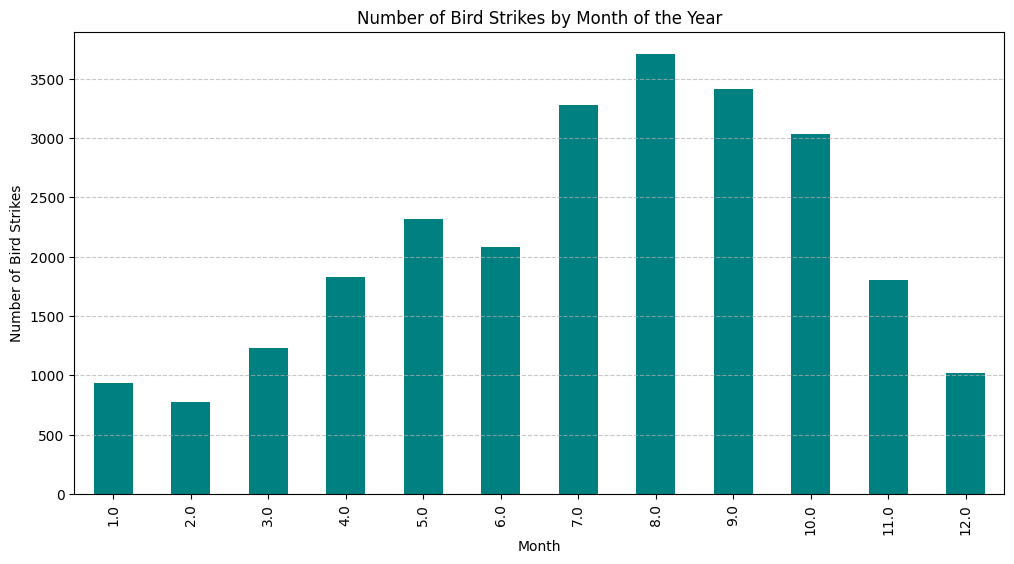

1.0      937
2.0      772
3.0     1233
4.0     1828
5.0     2318
6.0     2078
7.0     3278
8.0     3710
9.0     3417
10.0    3038
11.0    1801
12.0    1019
Name: Month, dtype: int64

In [9]:
# Extracting the month from the FlightDate column

df['Month'] = df['FlightDate'].dt.month

# Counting the number of bird strikes by month
monthly_data = df['Month'].value_counts().sort_index()

# Plotting the number of bird strikes by month of the year
plt.figure(figsize=(12, 6))
monthly_data.plot(kind='bar', color='teal')
plt.title('Number of Bird Strikes by Month of the Year')
plt.xlabel('Month')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

monthly_data

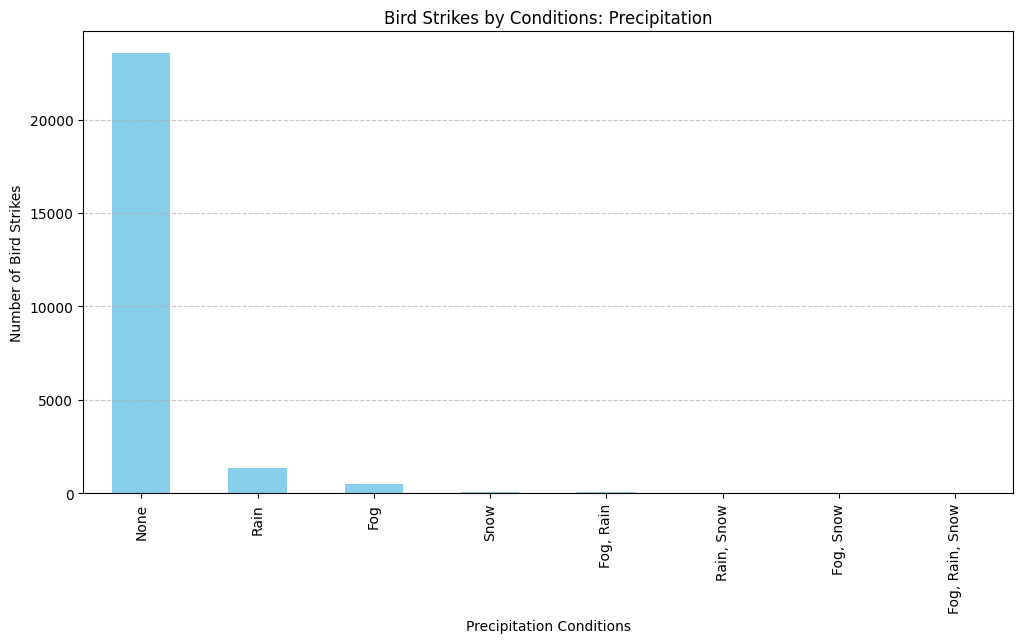

In [10]:
# Analyzing the distribution of bird strikes based on 'Conditions: Precipitation'
precipitation_data = df['Conditions: Precipitation'].value_counts()

# Analyzing the distribution of bird strikes based on 'Wildlife: Size'
wildlife_size_data = df['Wildlife: Size'].value_counts()

# Analyzing the distribution of bird strikes based on 'Conditions: Sky'
sky_conditions_data = df['Conditions: Sky'].value_counts()

# Plotting the distribution of bird strikes based on 'Conditions: Precipitation'
plt.figure(figsize=(12, 6))
precipitation_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes by Conditions: Precipitation')
plt.xlabel('Precipitation Conditions')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

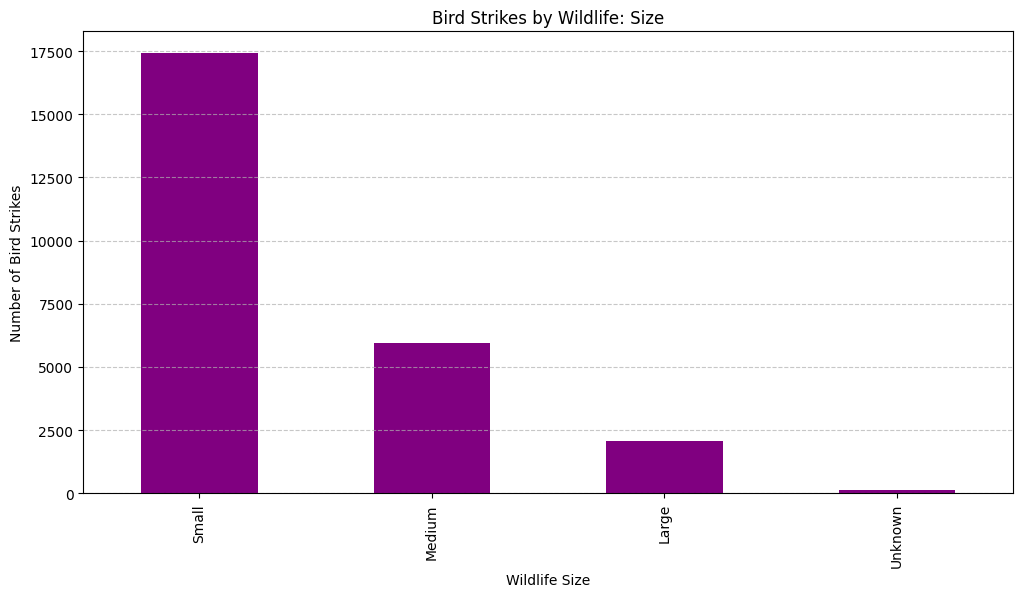

In [11]:
# Plotting the distribution of bird strikes based on 'Wildlife: Size'
plt.figure(figsize=(12, 6))
wildlife_size_data.plot(kind='bar', color='purple')
plt.title('Bird Strikes by Wildlife: Size')
plt.xlabel('Wildlife Size')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

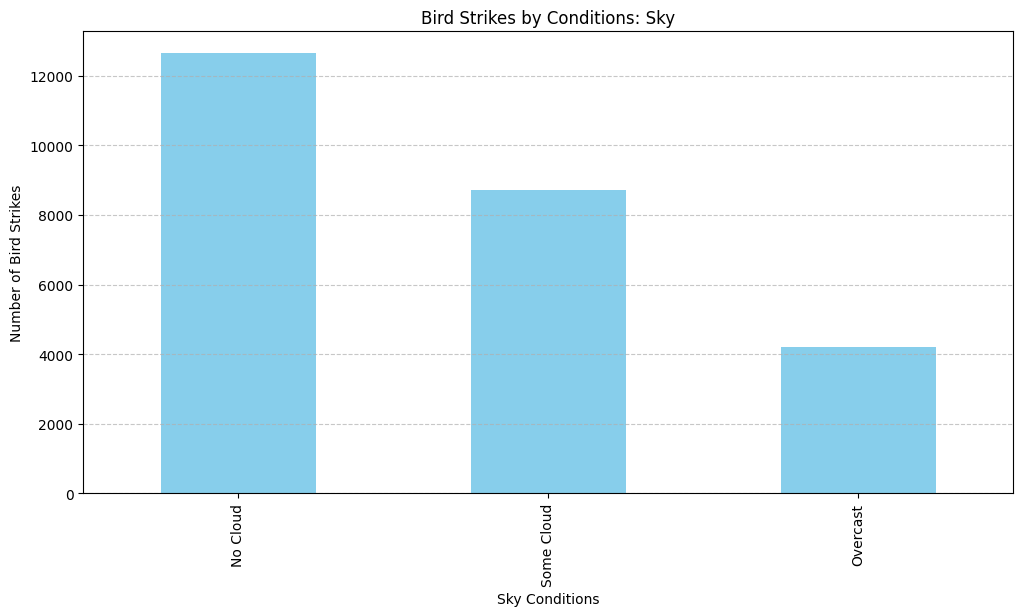

In [12]:
# Plotting the distribution of bird strikes based on 'Conditions: Sky'
plt.figure(figsize=(12, 6))
sky_conditions_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes by Conditions: Sky')
plt.xlabel('Sky Conditions')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [13]:
# Displaying the combined data
combined_data = pd.concat([
    precipitation_data.rename('Precipitation Conditions'),
    wildlife_size_data.rename('Wildlife Size'),
    sky_conditions_data.rename('Sky Conditions')
], axis=1)

precipitation_data, wildlife_size_data, sky_conditions_data

(None               23543
 Rain                1353
 Fog                  475
 Snow                  89
 Fog, Rain             85
 Rain, Snow             6
 Fog, Snow              4
 Fog, Rain, Snow        3
 Name: Conditions: Precipitation, dtype: int64,
 Small      17412
 Medium      5937
 Large       2080
 Unknown      129
 Name: Wildlife: Size, dtype: int64,
 No Cloud      12642
 Some Cloud     8706
 Overcast       4210
 Name: Conditions: Sky, dtype: int64)

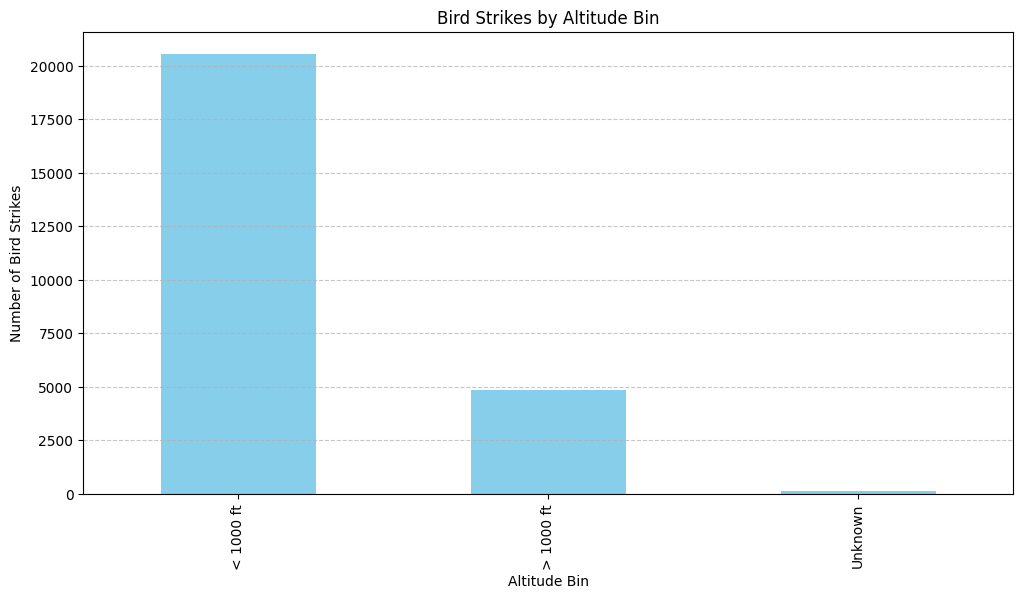

< 1000 ft    20556
> 1000 ft     4873
Unknown        129
Name: Altitude bin, dtype: int64

In [14]:
# Analyzing the distribution of bird strikes based on 'Altitude bin'
altitude_bin_data = df['Altitude bin'].value_counts()

# Plotting the distribution of bird strikes based on 'Altitude bin'
plt.figure(figsize=(12, 6))
altitude_bin_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes by Altitude Bin')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
altitude_bin_data

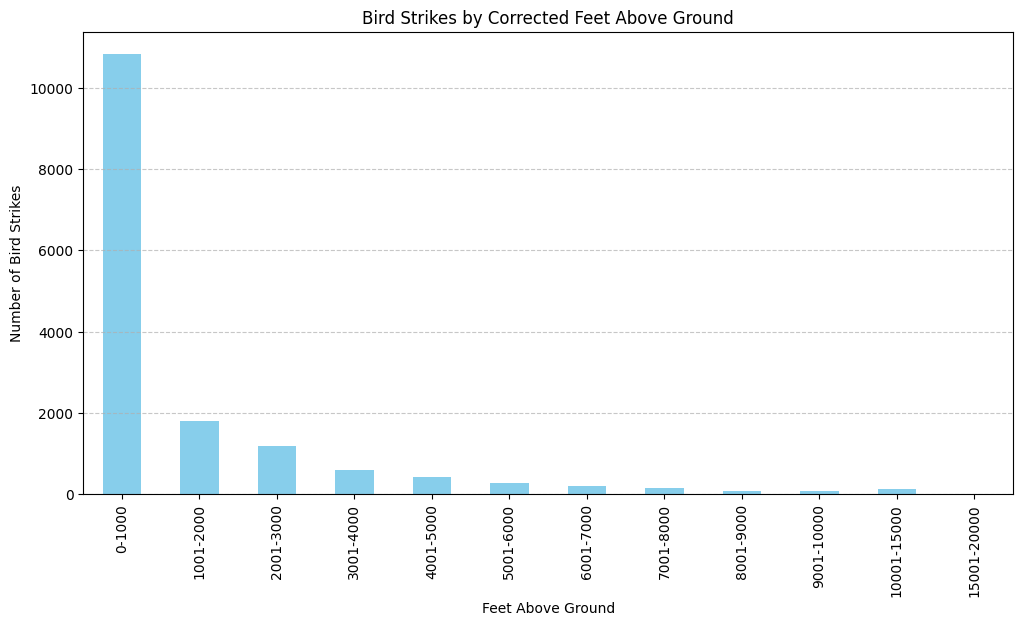

0-1000         10842
1001-2000       1807
2001-3000       1175
3001-4000        597
4001-5000        409
5001-6000        267
6001-7000        195
7001-8000        148
8001-9000         70
9001-10000        85
10001-15000      112
15001-20000        8
Name: Feet above ground bin, dtype: int64

In [15]:
# Correcting the binning process for 'Feet above ground'
# We'll define appropriate bins starting from 0
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 15000, 20000]
labels = ['0-1000', '1001-2000', '2001-3000', '3001-4000', '4001-5000', '5001-6000', '6001-7000', '7001-8000', '8001-9000', '9001-10000', '10001-15000', '15001-20000']

# Binning the data
df['Feet above ground bin'] = pd.cut(df['Feet above ground'], bins=bins, labels=labels)

# Counting the occurrences in each bin
feet_above_ground_corrected_data = df['Feet above ground bin'].value_counts().sort_index()

# Plotting the corrected distribution of bird strikes based on 'Feet above ground'
plt.figure(figsize=(12, 6))
feet_above_ground_corrected_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes by Corrected Feet Above Ground')
plt.xlabel('Feet Above Ground')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying the corrected altitude data
altitude_data_corrected = pd.concat([
    altitude_bin_data.rename('Altitude Bin'),
    feet_above_ground_corrected_data.rename('Corrected Feet Above Ground')
], axis=1)


feet_above_ground_corrected_data

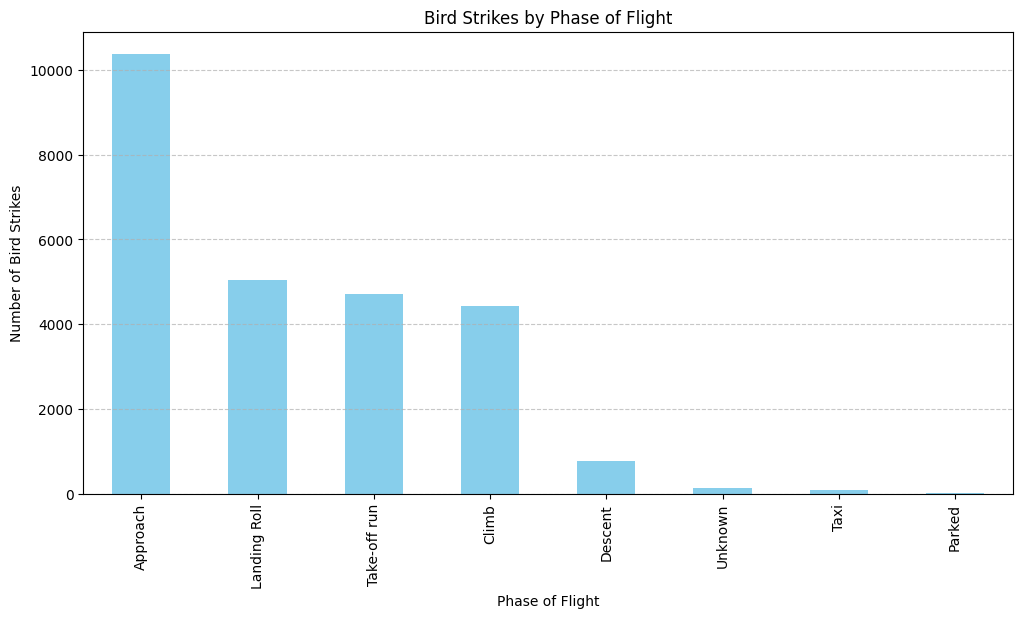

Approach        10382
Landing Roll     5047
Take-off run     4711
Climb            4429
Descent           776
Unknown           129
Taxi               74
Parked             10
Name: When: Phase of flight, dtype: int64

In [16]:
# Analyzing the distribution of bird strikes based on 'When: Phase of flight'
phase_of_flight_data = df['When: Phase of flight'].value_counts()

# Plotting the distribution of bird strikes based on 'When: Phase of flight'
plt.figure(figsize=(12, 6))
phase_of_flight_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes by Phase of Flight')
plt.xlabel('Phase of Flight')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

phase_of_flight_data

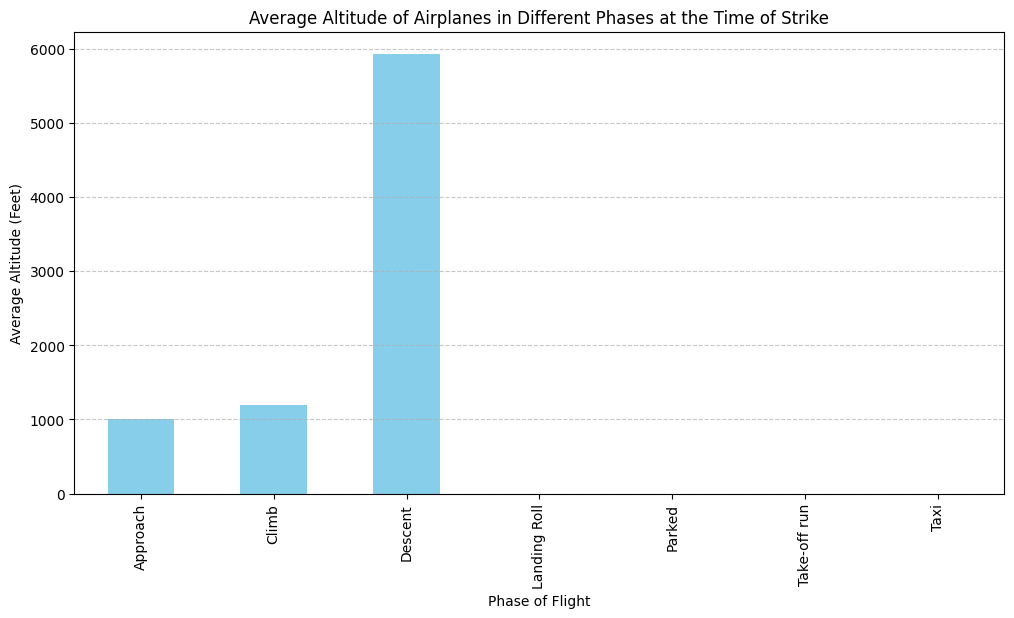

When: Phase of flight
Approach        1001.733385
Climb           1199.654324
Descent         5933.960052
Landing Roll       0.000000
Parked             0.000000
Take-off run       0.101040
Taxi               0.000000
Name: Feet above ground, dtype: float64

In [17]:
# Calculating the average altitude for each phase of flight
average_altitude_by_phase = df.groupby('When: Phase of flight')['Feet above ground'].mean().drop('Unknown')

# Plotting the average altitude by phase of flight
plt.figure(figsize=(12, 6))
average_altitude_by_phase.plot(kind='bar', color='skyblue')
plt.title('Average Altitude of Airplanes in Different Phases at the Time of Strike')
plt.xlabel('Phase of Flight')
plt.ylabel('Average Altitude (Feet)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

average_altitude_by_phase

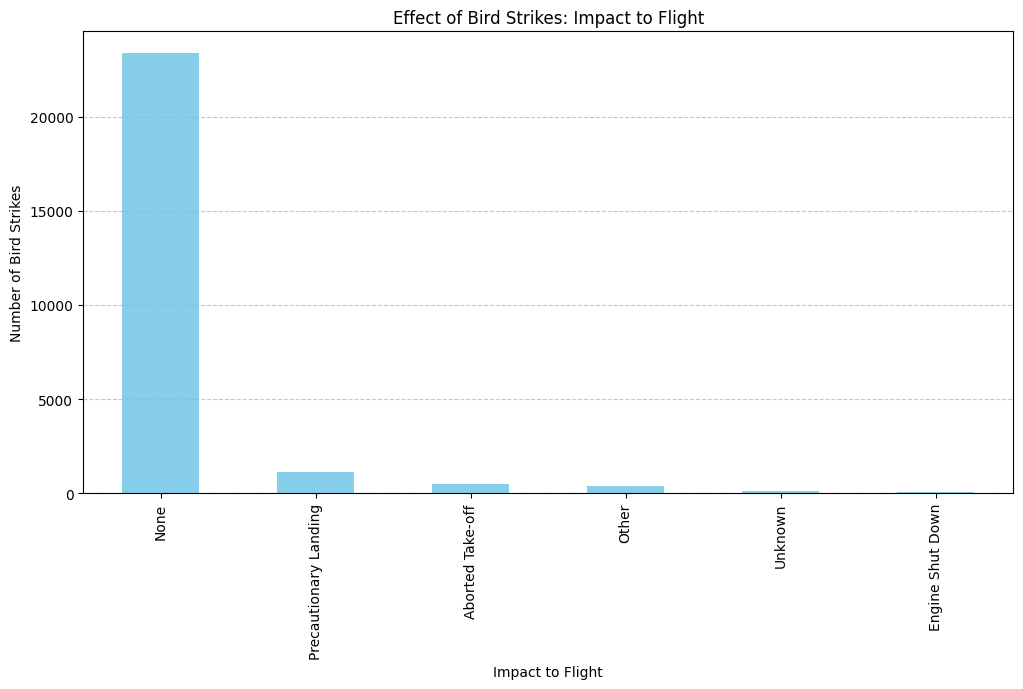

None                     23351
Precautionary Landing     1121
Aborted Take-off           479
Other                      390
Unknown                    129
Engine Shut Down            88
Name: Effect: Impact to flight, dtype: int64

In [18]:
# Analyzing the distribution of bird strikes based on 'Effect: Impact to flight'
impact_to_flight_data = df['Effect: Impact to flight'].value_counts()

# Analyzing the distribution of bird strikes based on 'Effect: Indicated Damage'
indicated_damage_data = df['Effect: Indicated Damage'].value_counts()

# Plotting the distribution of bird strikes based on 'Effect: Impact to flight'
plt.figure(figsize=(12, 6))
impact_to_flight_data.plot(kind='bar', color='skyblue')
plt.title('Effect of Bird Strikes: Impact to Flight')
plt.xlabel('Impact to Flight')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
impact_to_flight_data

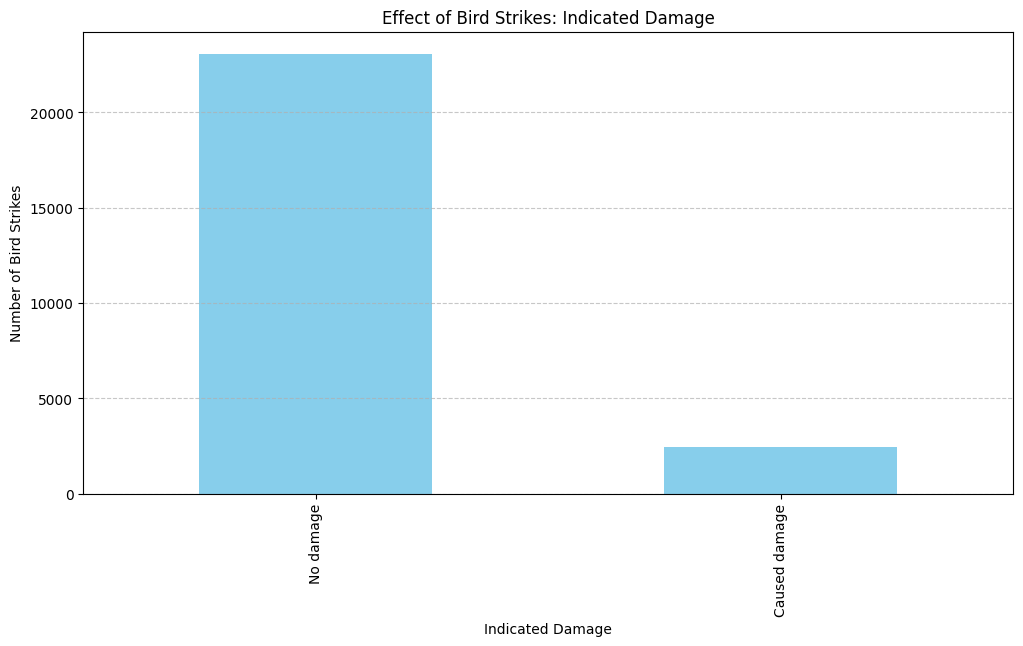

No damage        23081
Caused damage     2477
Name: Effect: Indicated Damage, dtype: int64

In [19]:
# Plotting the distribution of bird strikes based on 'Effect: Indicated Damage'
plt.figure(figsize=(12, 6))
indicated_damage_data.plot(kind='bar', color='skyblue')
plt.title('Effect of Bird Strikes: Indicated Damage')
plt.xlabel('Indicated Damage')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Displaying the effect of bird strikes data
effect_data_combined = pd.concat([
    impact_to_flight_data.rename('Impact to Flight'),
    indicated_damage_data.rename('Indicated Damage')
], axis=1)

indicated_damage_data

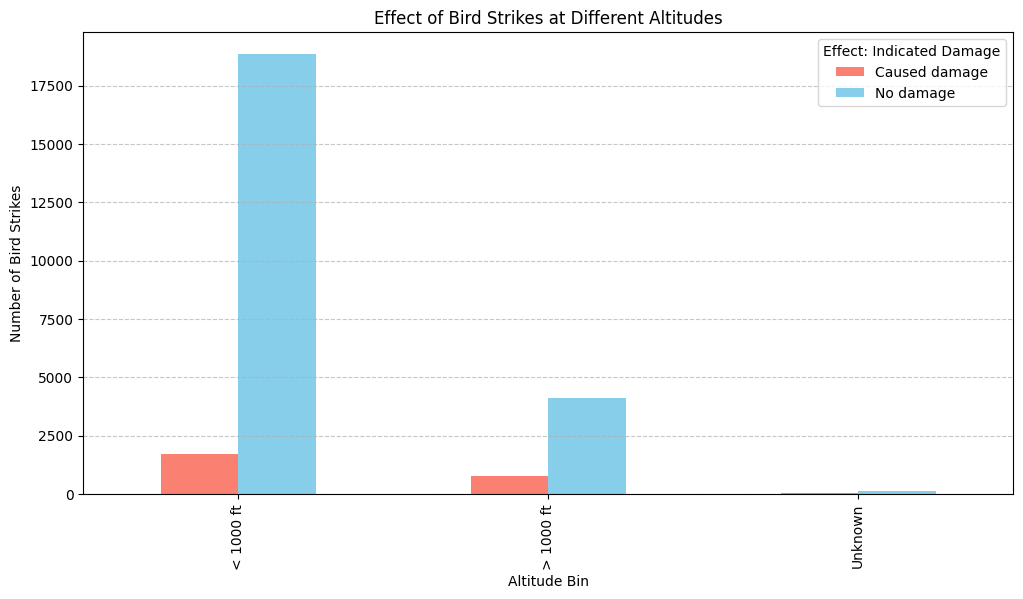

Effect: Indicated Damage,Caused damage,No damage
Altitude bin,,
< 1000 ft,1702,18854
> 1000 ft,752,4121
Unknown,23,106


In [20]:
# Grouping the data by altitude bins and calculating the count of each effect
effect_by_altitude = df.groupby(['Altitude bin', 'Effect: Indicated Damage']).size().unstack(fill_value=0)

# Plotting the effect of bird strikes at different altitudes
effect_by_altitude.plot(kind='bar', stacked=False, figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title('Effect of Bird Strikes at Different Altitudes')
plt.xlabel('Altitude Bin')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Effect: Indicated Damage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

effect_by_altitude

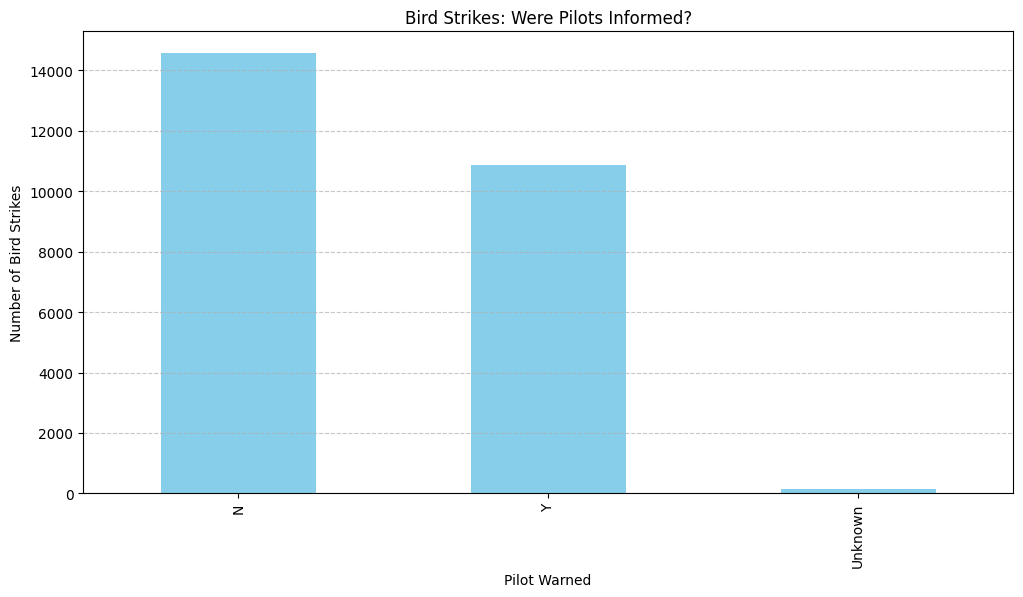

N          14567
Y          10862
Unknown      129
Name: Pilot warned of birds or wildlife?, dtype: int64

In [21]:
# Analyzing the distribution of bird strikes based on whether pilots were informed
pilot_informed_data = df['Pilot warned of birds or wildlife?'].value_counts()

# Analyzing the relationship between prior warning and the effect of the strike
warning_effect_relation = df.groupby(['Pilot warned of birds or wildlife?', 'Effect: Indicated Damage']).size().unstack(fill_value=0)

# Plotting the distribution of bird strikes based on whether pilots were informed
plt.figure(figsize=(12, 6))
pilot_informed_data.plot(kind='bar', color='skyblue')
plt.title('Bird Strikes: Were Pilots Informed?')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
pilot_informed_data

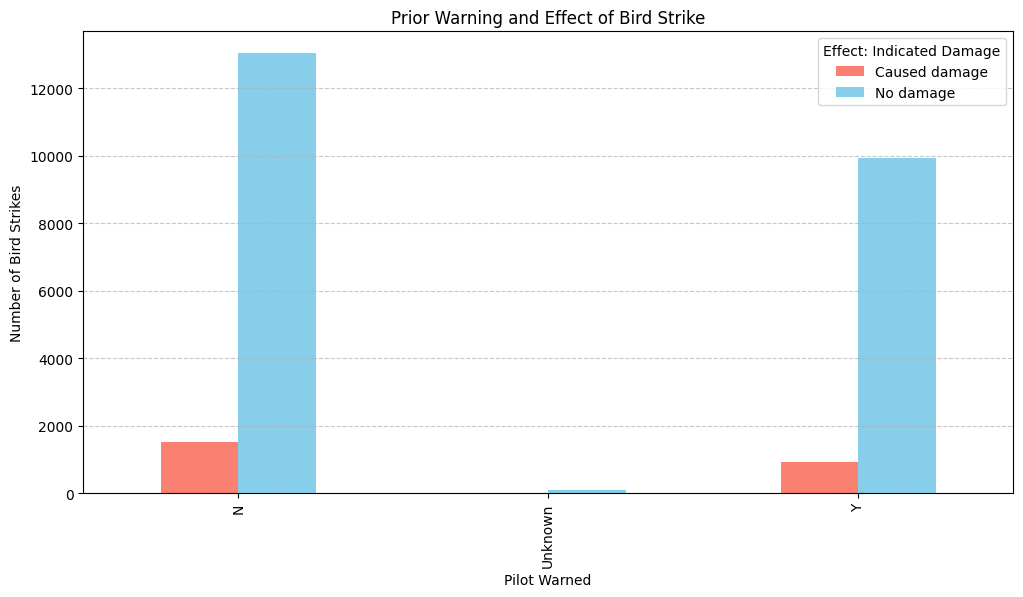

Effect: Indicated Damage,Caused damage,No damage
Pilot warned of birds or wildlife?,,
N,1532,13035
Unknown,23,106
Y,922,9940


In [22]:
# Plotting the relationship between prior warning and the effect of the strike
warning_effect_relation.plot(kind='bar', stacked=False, figsize=(12, 6), color=['salmon', 'skyblue'])
plt.title('Prior Warning and Effect of Bird Strike')
plt.xlabel('Pilot Warned')
plt.ylabel('Number of Bird Strikes')
plt.legend(title='Effect: Indicated Damage')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

warning_effect_relation